# Collecting data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read file
df = pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


In [3]:
df.shape

(7032, 21)

# Data Analysing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


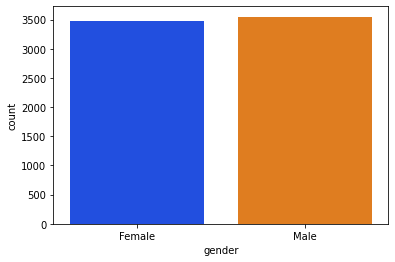

In [5]:
#bar plot
sns.countplot(x = df['gender'], palette = 'bright')
plt.show()

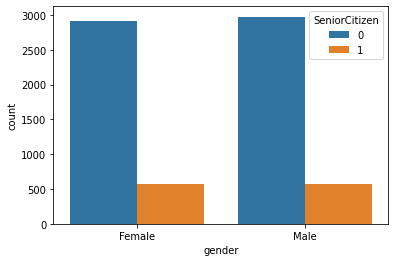

In [6]:
#bar plot
sns.countplot(df['gender'], hue = df['SeniorCitizen'])
plt.show()

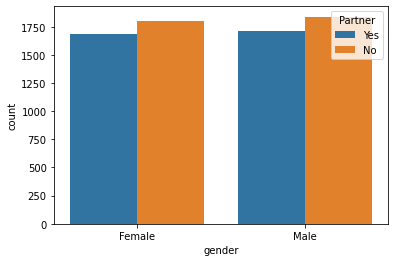

In [7]:
sns.countplot(df['gender'], hue = df['Partner'])
plt.show()

<BarContainer object of 7032 artists>

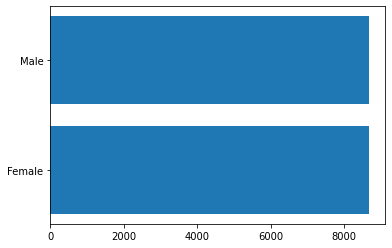

In [9]:
#horizontal bar plot
plt.barh(y = df['gender'], width = df['TotalCharges'])

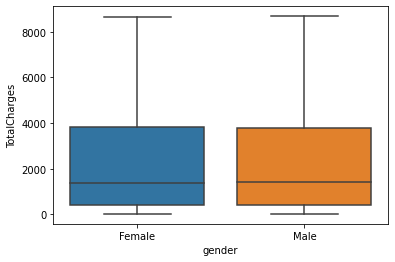

In [10]:
#box plot
sns.boxplot(df['gender'], y = df['TotalCharges'])

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


In [12]:
sen_citi = df[df['SeniorCitizen'] == 1]['tenure'].sum()
non_sen_citi = df[df['SeniorCitizen'] == 0]['tenure'].sum()

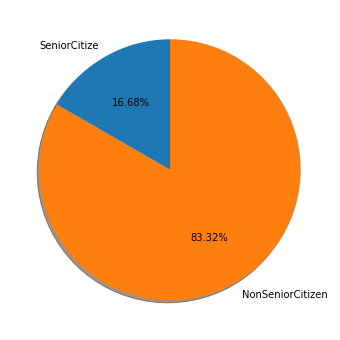

In [13]:
#pie chart
plt.figure(figsize = (6, 6))
plt.pie([sen_citi, non_sen_citi],labels=['SeniorCitize', 'NonSeniorCitizen'], autopct='%.2f%%', shadow=True, startangle=90)
plt.show()

In [14]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [15]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

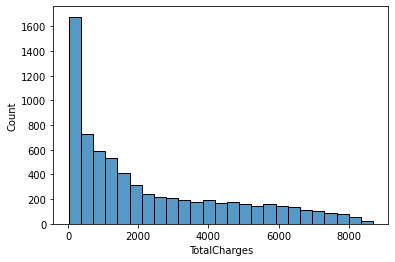

In [16]:
#histogram
sns.histplot(df['TotalCharges'])
plt.show()

In [17]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No


# One hot encoding

In [18]:
col = ['customerID',	'gender',	'SeniorCitizen',	'Partner',	'Dependents',	'PhoneService',	'MultipleLines',	
       'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	
       'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod',		'Churn']

In [19]:
# one hot encoding
male = pd.get_dummies(df['gender'], drop_first= True)
senior_citizen = pd.get_dummies(df['SeniorCitizen'], drop_first= True)
partner = pd.get_dummies(df['Partner'], drop_first= True)
dependents = pd.get_dummies(df['Dependents'], drop_first= True)
phone_service = pd.get_dummies(df['PhoneService'], drop_first= True)
multiple_lines = pd.get_dummies(df['MultipleLines'], drop_first= True)
internet_service = pd.get_dummies(df['InternetService'], drop_first= True)
online_security = pd.get_dummies(df['OnlineSecurity'], drop_first= True)
online_backup = pd.get_dummies(df['OnlineBackup'], drop_first= True)
device_protection = pd.get_dummies(df['DeviceProtection'], drop_first= True)
tech_support = pd.get_dummies(df['TechSupport'], drop_first= True)
streaming_tv = pd.get_dummies(df['StreamingTV'], drop_first= True)
streaming_movies = pd.get_dummies(df['StreamingMovies'], drop_first= True)
contract = pd.get_dummies(df['Contract'], drop_first= True)
paperless_billing = pd.get_dummies(df['PaperlessBilling'], drop_first= True)
payment_method = pd.get_dummies(df['PaymentMethod'], drop_first= True)
churn = pd.get_dummies(df['Churn'], drop_first= True)

In [20]:
new_df = pd.concat([df, male, senior_citizen, partner, dependents, phone_service, multiple_lines, internet_service, 
           online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies,
           contract, paperless_billing, payment_method], axis = 1)

In [21]:
new_df['churn'] = churn

In [22]:
new_df.drop(col, axis = 1, inplace = True)

In [23]:
new_df.head(3)

,tenure,MonthlyCharges,TotalCharges,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check,churn
0,9,65.6,593.30,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,9,59.9,542.40,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,4,73.9,280.85,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tenure                   7032 non-null   int64  
 1   MonthlyCharges           7032 non-null   float64
 2   TotalCharges             7032 non-null   float64
 3   Male                     7032 non-null   uint8  
 4   1                        7032 non-null   uint8  
 5   Yes                      7032 non-null   uint8  
 6   Yes                      7032 non-null   uint8  
 7   Yes                      7032 non-null   uint8  
 8   No phone service         7032 non-null   uint8  
 9   Yes                      7032 non-null   uint8  
 10  Fiber optic              7032 non-null   uint8  
 11  No                       7032 non-null   uint8  
 12  No internet service      7032 non-null   uint8  
 13  Yes                      7032 non-null   uint8  
 14  No internet service     

# Data Cleaning

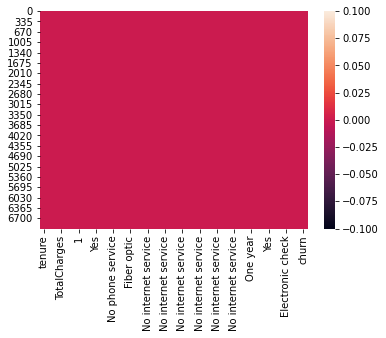

In [25]:
# to see null values
sns.heatmap(new_df.isnull())

No need to clean data it's good

In [26]:
new_df.shape

(7032, 31)

# Handling Imbalance

In [27]:
# to know the target whether they are balance or not
new_df['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

This shows the imbalance data. To balance it we are going to use SMOTE method

In [28]:
#seperate data into X and y
X = new_df.drop(['churn'], axis = 1).copy()
y = new_df['churn'].copy()

In [29]:
#import SMOTE
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE(sampling_strategy='minority')

In [31]:
# create equal amount of synthetic data using SMOTE
X_sm, y_sm = smote.fit_resample(X, y)

# Train and Test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#seperate them into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=0, stratify = y_sm)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()

In [36]:
rfc = rfc.fit(X_train, y_train)

In [37]:
train_pred = rfc.predict(X_train)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

To check training Accuracy

In [39]:
#train accuracy
accuracy_score(y_train, train_pred)

0.9988435964151489

Testing Accuracy

In [40]:
pred = rfc.predict(X_test)

In [41]:
#test accuracy
accuracy_score(y_test, pred)

0.8503521126760564

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1704
           1       0.87      0.83      0.85      1704

    accuracy                           0.85      3408
   macro avg       0.85      0.85      0.85      3408
weighted avg       0.85      0.85      0.85      3408



Now we can see our data is balanced, We have almost same value of f1-score, recall and precision for both class 

In [43]:
#function to plot confusion matrix
def plot_confusion_matrix(con_mat, class_name, figsize = (10, 8), fontsize = 13):
  plt.figure(figsize = figsize)
  df = pd.DataFrame(con_mat, index = class_name, columns = class_name)
  try:
    heatmap = sns.heatmap(df, annot = True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrics must be integer')
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, fontsize = fontsize)
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, fontsize = fontsize)
  plt.xlabel('Prediction')
  plt.ylabel('Truth')
  plt.show()

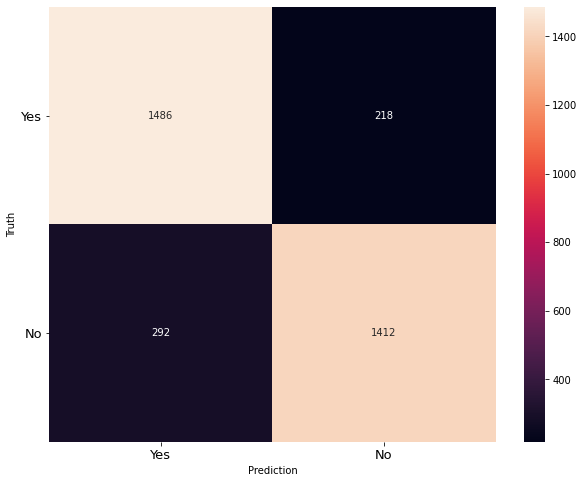

In [44]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, ['Yes', 'No'])

In [45]:
#function to plot roc curve
def plot_roc(clf, X_test):
  y_pred_proba = clf.predict_proba(X_test)[:, 1]
  score = roc_auc_score(y_test, y_pred_proba)
  fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
  plt.figure(figsize = (10, 7))
  plt.plot(fpr, tpr, color = 'red', label = 'ROC Curve with Area Under the Curve :'+str(score))
  plt.title('ROC Curve', size = 14)
  plt.legend(loc = 4)
  plt.show()

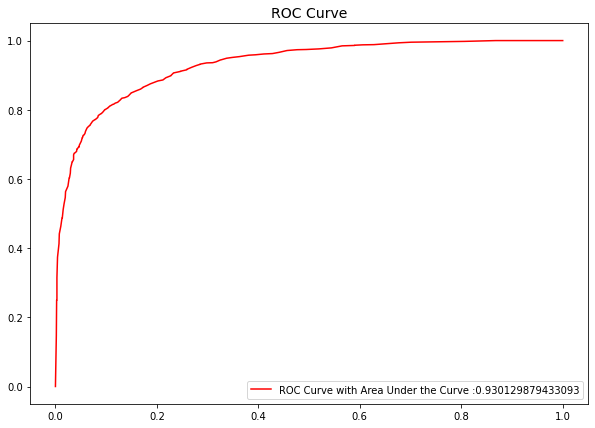

In [46]:
plot_roc(rfc, X_test)

# Hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
rc = RandomForestClassifier()

In [49]:
# parameters for tuning
params = [
          {'criterion' :['gini'], 'n_estimators' : [100, 300, 500, 800], 'max_depth' : [5, 8, 15, 25],
          'min_samples_split' : [2, 5, 10, 15], 'min_samples_leaf' : [1, 2, 5]},
          {'criterion' :['entropy'], 'n_estimators' : [100, 300, 500, 800], 'max_depth' : [5, 8, 15, 25],
          'min_samples_split' : [2, 5, 10, 15], 'min_samples_leaf' : [1, 2, 5]}
]

In [50]:
gs = GridSearchCV(estimator=rc, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1)

In [51]:
grs = gs.fit(X_train, y_train)

In [52]:
grs.best_score_

0.8662928820591753

In [53]:
grs.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [54]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=500)

In [55]:
rf_model = rf_model.fit(X_train, y_train)

In [56]:
pred = rf_model.predict(X_test)

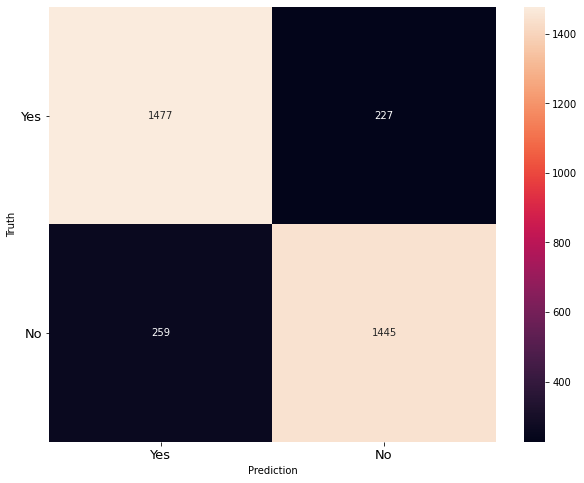

In [57]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, ['Yes', 'No'])

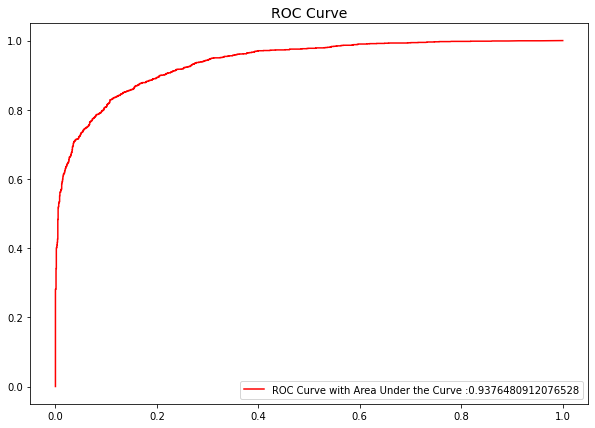

In [58]:
plot_roc(rf_model, X_test)

In [61]:
print('Accuracy score :', accuracy_score(y_test,pred))

Accuracy score : 0.8573943661971831
